<a href="https://colab.research.google.com/github/yigagilbert/cassava_disease_detection-model/blob/main/cassava_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import random

print(tf.__version__)
print(hub.__version__)
seed = 50
tf.random.set_seed(seed)
random.seed(seed)

2.8.2
0.12.0


In [ ]:
from google.colab import files, drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -q kaggle

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yigagilbert","key":"22051da3c41beb1e66628053b3779635"}'}

Make directory named kaggle and copy kaggle.json file there

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

change the permission of the file

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

test to see if my set up is okay

In [ ]:
! kaggle datasets list


ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                     Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           7282        222  1.0              
devansodariya/student-performance-data                       Student Performance Dataset                           7KB  2022-05-26 13:55:09           3137        127  0.9705882        
iamsouravbanerjee/software-professional-salaries-2022        Salary Dataset - 2022                               526KB  2022-06-10 06:02:59           1125         35  1.0              
paradisejoy/top-hits-spotify-from-20002019                   Top Hits Spoti

In [ ]:
! kaggle competitions download -c 'cassava-disease'

 99% 2.28G/2.30G [00:09<00:00, 202MB/s]
100% 2.30G/2.30G [00:09<00:00, 252MB/s]


In [ ]:
! unzip cassava-disease.zip > /dev/null

In [ ]:
! unzip test.zip > /dev/null
! unzip train.zip > /dev/null

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imageDataGenerator = ImageDataGenerator(rescale = 1/255,
                                        rotation_range = 45,
                                        horizontal_flip = True,
                                        vertical_flip = True,
                                        zoom_range = 0.2,
                                        shear_range = 10,
                                        validation_split = 0.2,
                                        )

train_gen = imageDataGenerator.flow_from_directory('/content/train/', target_size = (380, 380), subset = 'training', 
                                                   class_mode = 'categorical', batch_size = 32, shuffle = True)
val_gen = imageDataGenerator.flow_from_directory('/content/train/', target_size = (380, 380), subset = 'validation', 
                                                   class_mode = 'categorical', batch_size = 32, shuffle = False)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [ ]:
num_classes = 5

In [ ]:
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam

MODULE_HANDLE = "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1"
IMAGE_SIZE = (380, 380)

model = tf.keras.Sequential([
                             InputLayer(input_shape = IMAGE_SIZE + (3,)),
                             hub.KerasLayer(MODULE_HANDLE, trainable = False),
                             Dense(512,activation= 'relu'),
                             Dropout(0.33),
                             Dense(256,activation= 'relu' ),
                             Dropout(0.33),
                             Dense(128,activation= 'relu' ),
                             Dropout(0.33),
                             Dense(num_classes, activation='softmax'),
])

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              17673816  
                                                                 
 dense (Dense)               (None, 512)               918016    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
for layer in model.layers:
  print(layer.name + ':' + str(layer.trainable))

keras_layer:False
dense:True
dropout:True
dense_1:True
dropout_1:True
dense_2:True
dropout_2:True
dense_3:True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'model.h5'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose = 1, save_weights_only = True, monitor = 'val_loss', mode = 'auto', save_best_omly = True)

history = model.fit(train_gen, epochs= 25, verbose = 1, callbacks = [mc], validation_data= val_gen)

Epoch 1/25
142/142 [==============================] - ETA: 0s - loss: 0.9951 - acc: 0.6333
Epoch 1: saving model to model.h5
142/142 [==============================] - 256s 2s/step - loss: 0.9951 - acc: 0.6333 - val_loss: 0.7984 - val_acc: 0.6997
Epoch 2/25
142/142 [==============================] - ETA: 0s - loss: 0.8294 - acc: 0.7033
Epoch 2: saving model to model.h5
142/142 [==============================] - 215s 2s/step - loss: 0.8294 - acc: 0.7033 - val_loss: 0.7206 - val_acc: 0.7440
Epoch 3/25
142/142 [==============================] - ETA: 0s - loss: 0.7637 - acc: 0.7309
Epoch 3: saving model to model.h5
142/142 [==============================] - 216s 2s/step - loss: 0.7637 - acc: 0.7309 - val_loss: 0.6944 - val_acc: 0.7378
Epoch 4/25
142/142 [==============================] - ETA: 0s - loss: 0.7580 - acc: 0.7398
Epoch 4: saving model to model.h5
142/142 [==============================] - 214s 2s/step - loss: 0.7580 - acc: 0.7398 - val_loss: 0.6716 - val_acc: 0.7688
Epoch 5/25
1

In [ ]:
import os
os.chdir('/content/drive/MyDrive/my models')
!wget -c '/content/model.h5' --no-check-certificate

/content/model.h5: Scheme missing.


In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/model.h5')
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: ignored

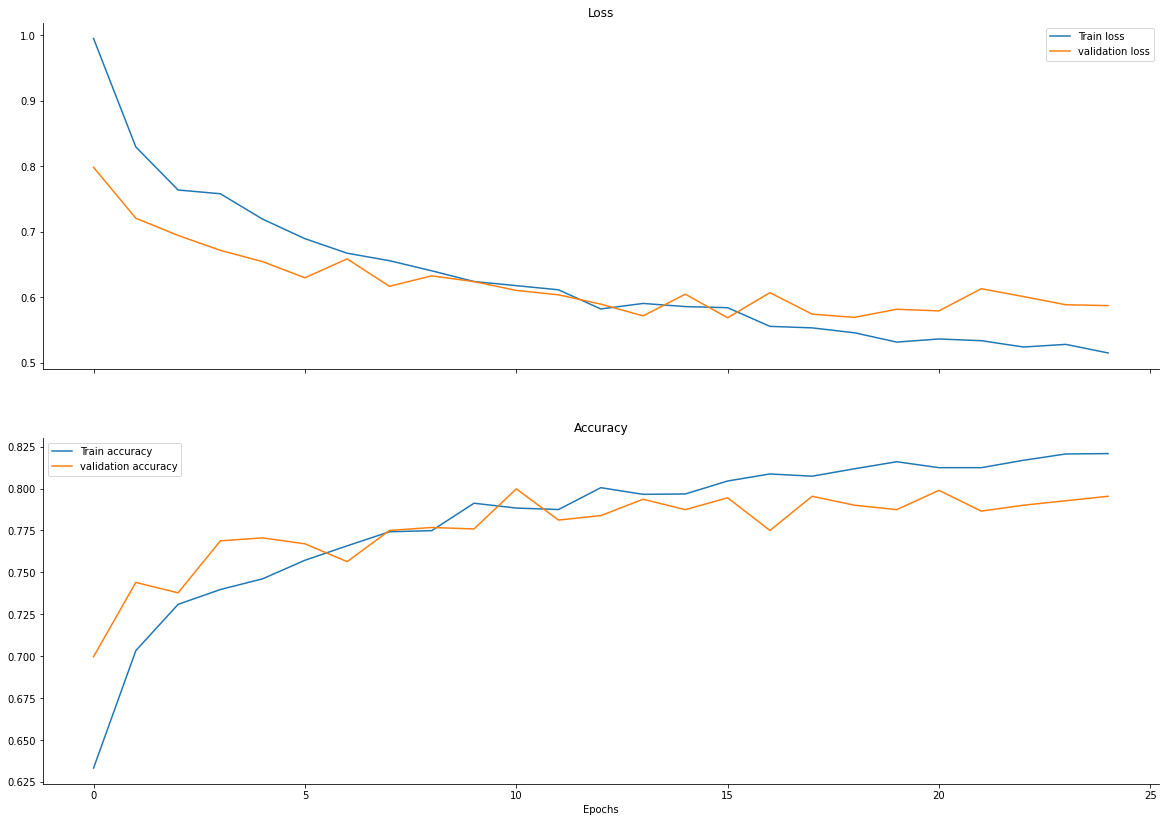

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

history = history.history
fig, (ax1, ax2) = plt.subplots(2, 1, sharex= 'col', figsize = (20, 14))

ax1.plot(history['loss'], label = 'Train loss')
ax1.plot(history['val_loss'], label = 'validation loss')
ax1.legend(loc = 'best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label = 'Train accuracy')
ax2.plot(history['val_acc'], label = 'validation accuracy')
ax2.legend(loc = 'best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()